In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/adult.data.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


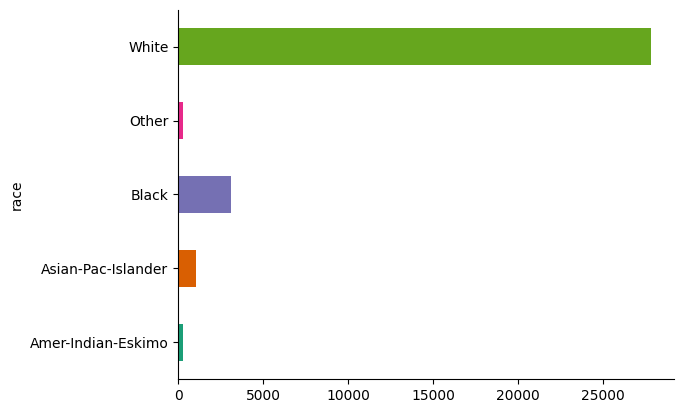

In [ ]:
# @title race

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
def straight_f(params):
  all_wheels=params['all_wheels']
  side_track=params['side_track']
  speed=params['speed']




SyntaxError: 'return' outside function (<ipython-input-9-242ce6a7d7c3>, line 8)

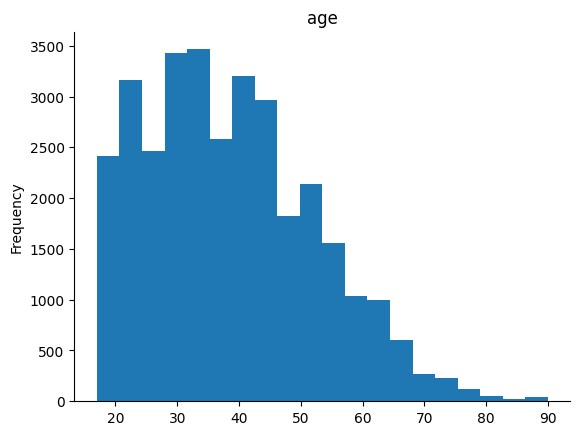

In [ ]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

array([<Axes: ylabel='<=50K'>, <Axes: ylabel='>50K'>], dtype=object)

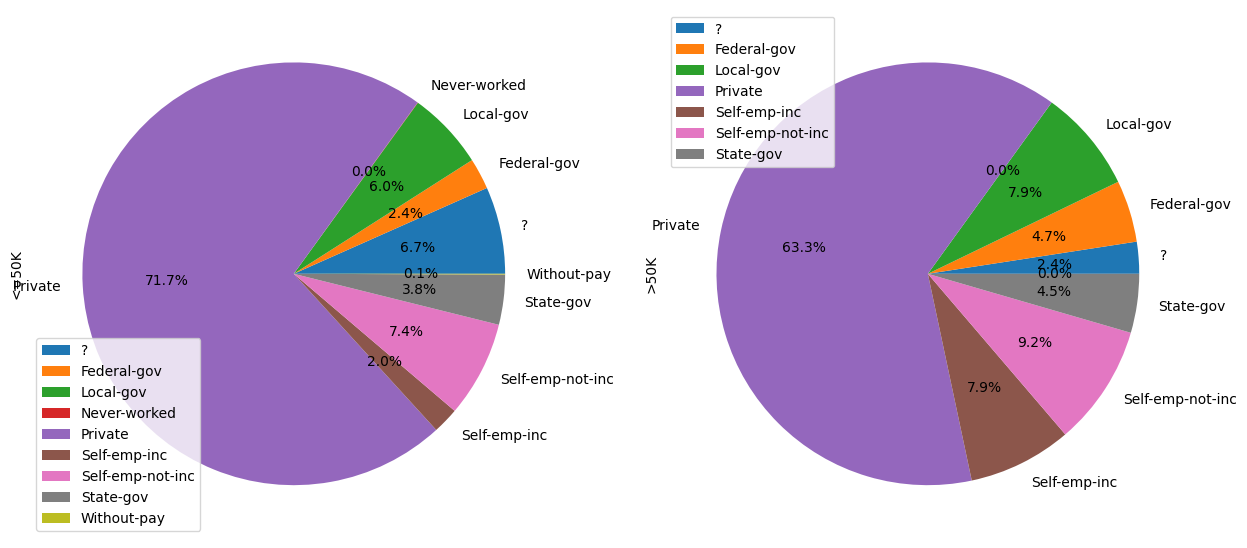

In [ ]:
# @title Workclass Distribution by Salary

(df.groupby(['workclass', 'salary']).size().unstack().plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%'))

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
v=df.columns

In [ ]:
df[v].nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


In [ ]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.1 MB/s eta 0:00:00


In [ ]:
app = dash.Dash(__name__)


In [ ]:
app.layout = html.Div([
    dcc.Graph(id='graph'),
    dcc.Dropdown(id='dropdown',
                 options=[
                     {'label': col, 'value': col} for col in df.columns
                 ],
                 value='age')
])


In [ ]:
@app.callback(
    Output('graph', 'figure'),
    [Input('dropdown', 'value')]
)
def update_graph(selected_column):
    fig = px.histogram(df, x=selected_column)
    return fig


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load the dataset


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of your dashboard
app.layout = html.Div([
    dcc.Graph(id='histogram'),
    dcc.Graph(id='scatter'),  # <- Added missing comma here
    dcc.Dropdown(id='dropdown',
                 options=[
                     {'label': col, 'value': col} for col in df.columns
                 ],
                 value='age')
])

# Define callback functions
@app.callback(
    Output('histogram', 'figure'),
    [Input('dropdown', 'value')]
)
def update_histogram(selected_column):
    fig = px.histogram(df, x=selected_column)
    return fig

@app.callback(
    Output('scatter', 'figure'),
    [Input('dropdown', 'value')]
)
def update_scatter(selected_column):
    fig = px.scatter(df, x=selected_column, y='salary', color='salary')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)




<IPython.core.display.Javascript object>

In [ ]:
ss= df['race'].value_counts()

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    1
salary            1
dtype: int64

In [ ]:
fruits = ['apple', 'banana', 'cherry']
for index, fruit in enumerate(fruits):
    print(index, fruit)





0 apple
1 banana
2 cherry


[]

In [ ]:
import pandas as pd

# Define the function
def calculate_demographic_data(print_data):
    df = pd.read_csv('/content/adult.data.csv')
    race_count = df['race'].value_counts()
    average_age_men = df[df['sex']=='male']['age'].mean()
    percentage_bachelors = (df['education']=='Bachelors').mean()*100
    higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
    lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
    higher_education_rich =(higher_education['salary'] == '>50K').mean() * 100
    lower_education_rich = (lower_education['salary'] == '>50K').mean() * 100
    min_work_hours =  df['hours-per-week'].min()
    num_min_workers =df[df['hours-per-week'] == min_work_hours]
    rich_percentage = (num_min_workers['salary'] == '>50K').mean() * 100
    highest_earning_country =(df[df['salary'] == '>50K']['native-country']
                               .value_counts().idxmax())
    highest_earning_country_percentage = ((df[df['native-country'] == highest_earning_country]['salary'] == '>50K')
                                          .mean() * 100)
    top_IN_occupation =  (df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]
                         ['occupation'].value_counts().idxmax())
    if print_data:
        print("Number of each race:\n", race_count)
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)
    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }

# Run the function with print_data=True to see the output
calculate_demographic_data(print_data=True)


Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Average age of men: nan
Percentage with Bachelors degrees: 16.44605509658794%
Percentage with higher education that earn >50K: 46.535843011613935%
Percentage without higher education that earn >50K: 17.3713601914639%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: United-States
Highest percentage of rich people in country: 24.583476174151524%
Top occupations in India: Prof-specialty


{'race_count': White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
 Name: race, dtype: int64,
 'average_age_men': nan,
 'percentage_bachelors': 16.44605509658794,
 'higher_education_rich': 46.535843011613935,
 'lower_education_rich': 17.3713601914639,
 'min_work_hours': 1,
 'rich_percentage': 10.0,
 'highest_earning_country': 'United-States',
 'highest_earning_country_percentage': 24.583476174151524,
 'top_IN_occupation': 'Prof-specialty'}

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {'A': [10, 20, 30, 40],
        'B': [50, 60, 70, 80]}
df = pd.DataFrame(data)

# Find the index of the maximum value in column 'A'
max_index = df['A'].idxmax()

print("Index of maximum value in column 'A':", max_index)


Index of maximum value in column 'A': 3


In [ ]:
def reward_function(params):
    # Read input parameters
    all_wheels_on_track = params['all_wheels_on_track']
    distance_from_center = params['distance_from_center']
    track_width = params['track_width']
    progress = params['progress']
    steps = params['steps']

    # Give a very low reward by default
    reward = 1e-3

    # Check if all wheels are on track and car is within track borders
    if all_wheels_on_track and (0.5 * track_width - distance_from_center) >= 0.05:
        # Give a higher reward for being on track and making progress
        reward = 1.0

        # Penalize for being too far from the center line
        reward -= 0.5 * distance_from_center

        # Encourage higher speed
        speed_reward = params['speed'] / params['steps']  # Adjust for varying time steps
        reward += speed_reward

        # Reward for making progress towards the finish line within time limit
        if progress == 100:
            # Adjust the time limit according to your track length and desired lap time
            target_time_limit = 120  # 2 minutes in seconds
            if steps <= target_time_limit:
                reward += 10.0  # High reward for finishing within time limit

    return float(reward)


<function __main__.reward_function(params)>

In [ ]:
def reward_function(params):
  all_wheels_on_track=params['all_wheels_on_track']
  side=params['side']
  stay_on_track=params['stay_on_track']


  if



In [ ]:
def reward_function(params):
    # Constants
    MAX_REWARD = 1.0
    MIN_REWARD = 1e-3
    MAX_SPEED = 10.0  # Maximum achievable speed
    SPEED_THRESHOLD = 2.0  # Minimum speed to maintain
    MIN_SPEED = 1.0  # Minimum speed to slow down
    SPEED_REDUCTION_FACTOR = 0.5  # Factor to reduce speed when approaching the edge
    TIME_LIMIT = 120.0  # 2 minutes

    # Read input parameters
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    speed = params['speed']
    all_wheels_on_track = params['all_wheels_on_track']
    progress = params['progress']
    steps = params['steps']

    # Calculate reward based on staying on track
    if not all_wheels_on_track:
        reward = MIN_REWARD
        return float(reward)

    # Calculate reward based on distance from center
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width

    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = MIN_REWARD

    # Adjust speed based on distance from center
    if distance_from_center <= marker_2:
        reward *= 1.5
        if distance_from_center <= marker_1:
            # Increase speed when close to the center
            speed = min(MAX_SPEED, speed * 1.2)
        elif distance_from_center > marker_1 and speed > MIN_SPEED:
            # Reduce speed when approaching the edge
            speed *= SPEED_REDUCTION_FACTOR

    # Calculate reward based on progress and time
    if progress == 100:
        reward += MAX_REWARD
    elif steps > TIME_LIMIT / 2:
        reward *= 0.5

    return float(reward)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df2=pd.read_csv("/content/Sample - Superstore.csv",encoding='windows-1252')

In [ ]:
df2.head()

In [ ]:
df2.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
pip install beautifulsoup4


In [ ]:
pip install requests

In [ ]:
!pip install selenium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
